In [1]:
from vadetisweb.anomaly_algorithms.detection.cluster import cluster_gaussian_mixture
from vadetisweb.anomaly_algorithms.detection.histogram import histogram
from vadetisweb.anomaly_algorithms.detection.svm import svm
from vadetisweb.anomaly_algorithms.detection.isolation_forest import isolation_forest
from vadetisweb.anomaly_algorithms.detection.lisa import lisa_pearson, lisa_dtw, lisa_geo
from vadetisweb.anomaly_algorithms.detection.robust_pca import robust_pca_huber_loss
from vadetisweb.models import DataSet, TimeSeries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
#input
def get_dataset(title):
    dataset = DataSet.objects.filter(title=title).first()
    training_dataset = dataset.training_dataset.all().first()
    return dataset, training_dataset

def get_ts_ids(dataset, ts_names):
    ts_ids = []
    time_series = dataset.timeseries_set.all()
    for ts in time_series:
        if ts.name in ts_names:
            ts_ids.append(ts.id)
            
    return ts_ids

In [4]:
def rpca_detection_l(df, df_class, df_train, df_train_class, delta=1, n_components=2, maximize_score='F1-Score', train_size=0.5):
    return robust_pca_huber_loss(df, df_class, df_train, df_train_class, delta=delta, n_components=n_components, maximize_score=maximize_score, train_size=train_size)

In [5]:
def histogram_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', train_size=0.5):
    return histogram(df, df_class, df_train, df_train_class, maximize_score=maximize_score, train_size=train_size)

In [6]:
def cluster_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_components=3, n_init=3, train_size=0.5):
    return cluster_gaussian_mixture(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_components=n_components, n_init=n_init, train_size=train_size)

In [7]:
def svm_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', nu=0.95, kernel='rbf', train_size=0.5):
    return svm(df, df_class, df_train, df_train_class, maximize_score=maximize_score, nu=nu, kernel=kernel, train_size=train_size)

In [8]:
def isolation_forest_detection_l(df, df_class, df_train, df_train_class, maximize_score='F1-Score', n_jobs=-1, bootstrap=False, n_estimators=40, train_size=0.5):
    return isolation_forest(df, df_class, df_train, df_train_class, maximize_score=maximize_score, n_jobs=n_jobs, bootstrap=bootstrap, n_estimators=n_estimators, train_size=train_size)

In [2]:
# Hum1 Multi - TS NUMBER
dataset_name = 'Humidity Multi'
ts_names = ['LUZ', 'RGNOT', 'MOA', 'KOP', 'LAG', 'OBR', 'LAE', 'ORO', 'PAY']
ts_name_lisa = 'LUZ'
dimensions = [2, 3, 4, 5, 6, 7, 8, 9]

In [10]:
# TS NUMBER - RPCA
dataset, training_dataset = get_dataset(dataset_name)
# Results array [nmi, rmse, f1]
r_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    scores, y_hat_results, df_common_class, info = rpca_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    r_results.append(result)
    
rpca_results = np.array(r_results)  

In [11]:
# TS NUMBER - HISTOGRAM
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
h_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    scores, y_hat_results, df_common_class, info = histogram_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    h_results.append(result)
    
histogram_results = np.array(h_results)

In [12]:
# TS NUMBER - CLUSTER
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
c_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    scores, y_hat_results, df_common_class, info = cluster_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    c_results.append(result)
    
cluster_results = np.array(c_results)  

In [13]:
# TS NUMBER - SVM
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
s_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    scores, y_hat_results, df_common_class, info = svm_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    s_results.append(result)
    
svm_results = np.array(s_results)

In [14]:
# TS NUMBER - ISOLATION FOREST
dataset, training_dataset = get_dataset(dataset_name)

# Results array [nmi, rmse, f1]
i_results = []
for l in dimensions:
    set_names = ts_names[0:l]
    ts_ids = get_ts_ids(dataset, set_names)
    
    df = dataset.dataframe[ts_ids]
    df_class = dataset.dataframe_class[ts_ids]
    df_train = training_dataset.dataframe[ts_ids]
    df_train_class = training_dataset.dataframe_class[ts_ids]
    
    scores, y_hat_results, df_common_class, info = isolation_forest_detection_l(df, df_class, df_train, df_train_class)
    result = [np.round(info['nmi'], 3), np.round(info['rmse'], 3), np.round(info['f1_score'], 3)]
    i_results.append(result)

isolation_results = np.array(i_results)

In [15]:
scores = [{ 'title' : 'RPCA', 'scores' :  rpca_results }, 
          { 'title' : 'Histogram', 'scores' :  histogram_results }, 
          { 'title' : 'Cluster', 'scores' :  cluster_results }, 
          { 'title' : 'SVM', 'scores' :  svm_results }, 
          { 'title' : 'Isolation Forest', 'scores' :  isolation_results }
         ]

In [16]:
print(scores)

[{'title': 'RPCA', 'scores': array([[0.016, 0.021, 0.059],
       [0.653, 0.009, 0.774],
       [0.751, 0.009, 0.881],
       [0.483, 0.035, 0.653],
       [0.702, 0.009, 0.857],
       [0.72 , 0.009, 0.857],
       [0.687, 0.01 , 0.848],
       [0.755, 0.008, 0.887]])}, {'title': 'Histogram', 'scores': array([[0.001, 0.453, 0.045],
       [0.   , 0.526, 0.046],
       [0.013, 0.571, 0.032],
       [0.006, 0.589, 0.043],
       [0.004, 0.615, 0.048],
       [0.008, 0.656, 0.043],
       [0.   , 0.687, 0.06 ],
       [0.001, 0.703, 0.059]])}, {'title': 'Cluster', 'scores': array([[0.351, 0.041, 0.479],
       [0.697, 0.008, 0.813],
       [0.59 , 0.015, 0.784],
       [0.525, 0.019, 0.736],
       [0.536, 0.017, 0.742],
       [0.535, 0.016, 0.733],
       [0.552, 0.015, 0.747],
       [0.49 , 0.018, 0.697]])}, {'title': 'SVM', 'scores': array([[0.633, 0.009, 0.794],
       [0.427, 0.03 , 0.609],
       [0.568, 0.015, 0.761],
       [0.482, 0.019, 0.611],
       [0.312, 0.025, 0.513],
 

In [4]:
import numpy as np
scores = [{'title': 'RPCA', 'scores': np.array([[0.016, 0.021, 0.059],
       [0.653, 0.009, 0.774],
       [0.751, 0.009, 0.881],
       [0.483, 0.035, 0.653],
       [0.702, 0.009, 0.857],
       [0.72 , 0.009, 0.857],
       [0.687, 0.01 , 0.848],
       [0.755, 0.008, 0.887]])}, {'title': 'Histogram', 'scores': np.array([[0.001, 0.453, 0.045],
       [0.   , 0.526, 0.046],
       [0.013, 0.571, 0.032],
       [0.006, 0.589, 0.043],
       [0.004, 0.615, 0.048],
       [0.008, 0.656, 0.043],
       [0.   , 0.687, 0.06 ],
       [0.001, 0.703, 0.059]])}, {'title': 'Cluster', 'scores': np.array([[0.351, 0.041, 0.479],
       [0.697, 0.008, 0.813],
       [0.59 , 0.015, 0.784],
       [0.525, 0.019, 0.736],
       [0.536, 0.017, 0.742],
       [0.535, 0.016, 0.733],
       [0.552, 0.015, 0.747],
       [0.49 , 0.018, 0.697]])}, {'title': 'SVM', 'scores': np.array([[0.633, 0.009, 0.794],
       [0.427, 0.03 , 0.609],
       [0.568, 0.015, 0.761],
       [0.482, 0.019, 0.611],
       [0.312, 0.025, 0.513],
       [0.213, 0.036, 0.437],
       [0.169, 0.036, 0.372],
       [0.082, 0.153, 0.233]])}, {'title': 'Isolation Forest', 'scores': np.array([[0.227, 0.075, 0.331],
       [0.095, 0.071, 0.262],
       [0.026, 0.237, 0.14 ],
       [0.015, 0.285, 0.116],
       [0.005, 0.289, 0.092],
       [0.008, 0.285, 0.101],
       [0.012, 0.386, 0.102],
       [0.004, 0.345, 0.088]])}]


In [11]:
def generate_nmi_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,0], marker=".", label=title)
    ax.set_ylabel('Score (NMI)')
    ax.set_xlabel('Number of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    plt.xticks(np.arange(min(dimension), max(dimension)+1, 1))
    ax.set_ylim([-0.1, 1.05])
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    fig.tight_layout()
    plt.show()

In [12]:
def generate_rmse_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,1], marker=".", label=title)
    ax.set_ylabel('Score (RMSE)')
    ax.set_xlabel('Number of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    plt.xticks(np.arange(min(dimension), max(dimension)+1, 1))
    ax.set_ylim([-0.1, 1.05])
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    fig.tight_layout()
    plt.show()

In [13]:
def generate_f1_line_chart(dimension, scores):
    fig, ax = plt.subplots()
    
    for score in scores:
        title = score['title']
        results = score['scores']
        ax.plot(dimension, results[:,2], marker=".", label=title)
    ax.set_ylabel('Score (F1)')
    ax.set_xlabel('Number of TS')
    ax.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", borderaxespad=0, ncol=3)
    plt.xticks(np.arange(min(dimension), max(dimension)+1, 1))
    ax.set_ylim([-0.1, 1.05])
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    fig.tight_layout()
    plt.show()

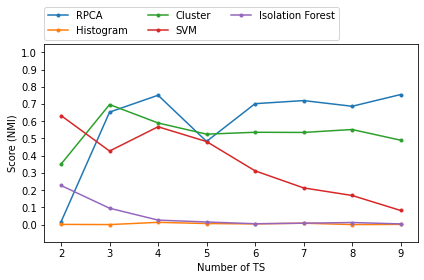

In [14]:
generate_nmi_line_chart(dimensions, scores)

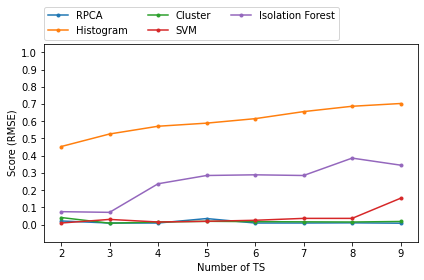

In [15]:
generate_rmse_line_chart(dimensions, scores)

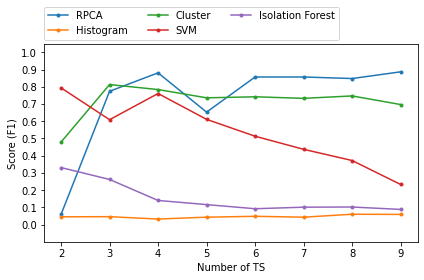

In [16]:
generate_f1_line_chart(dimensions, scores)